# 验证实践：网格搜索

偏差和方差权衡，取决于模型复杂度和训练集规模

在实践中，模型通常有多于一个开关进行调节，因此前面关于验证曲线和学习曲线的二维线条就会变成多维平面。在这些情况下，要将它可视化出来是很困难的，并且我们更希望简单的找到特定模型能最大化验证分数。

Scikit-Learn提供了自动化的工具来完成这项任务，它们在网格搜索模块中。下面是一个使用网格搜索找到最优多项式模型的例子。我们会探索模型特征的一个三维网格；包括多项式阶数，一个是否拟合截距的标志和一个是否归一化问题的标志。这可以通过Scikit-Learn的`GridSearchCV`元评估器来设置：

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

#管道所需的模块
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

def make_data(N, err=1.0, rseed=1):
    # 随机数据取样生成
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

>网格搜索模型和普通模型一样，实例化后还未应用到任何数据上。通过调用`fit()`方法会将模型的每个网格点拟合到数据上，同时过程中保存了验证的分数：

In [ ]:
grid.fit(X, y);

In [10]:
#获取最优参数
grid.best_params_


{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

>最终，需要的话，我们可以使用代码将最佳模型、数据及它们的拟合情况绘制出来：

c:\Users\OS\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


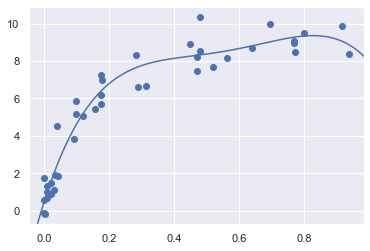

In [12]:
model = grid.best_estimator_

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

网格搜索提供很多其他参数，包括指定自定义的评分函数，并行化计算和执行随机搜索等等